# Quant Trading Strategies HW 2 - Madison Rusch (12365298)

## Data

In [3]:
# FTSL SMH
import matplotlib.pyplot as plt
%matplotlib inline

plt.rcParams['figure.figsize'] = (12,6)
plt.rcParams['font.size'] = 15
plt.rcParams['legend.fontsize'] = 13
import quandl
import pandas as pd
import numpy as np
import functools
import warnings
warnings.filterwarnings('ignore')
import logging
logging.getLogger('matplotlib.font_manager').setLevel(logging.ERROR)
import seaborn as sns
import datetime
import statsmodels.api as sm

# Fetch Data
@functools.lru_cache(maxsize=1600)
def fetch_quandl(my_data_items, trim_start=None, trim_end=None, returns="pandas"):
    qdata = quandl.get(list(my_data_items), returns=returns, 
                      trim_start=trim_start,
                      trim_end=trim_end,
                      api_key='bXgDCzJUfS5ZxasswLcN')
    return qdata

# Taken from class example
def clean_quandl_columns(dataframe):
    replacement_columns = {}
    for c in dataframe.columns:
        series_name, variable = c.split(' - ')
        source_name, asset = series_name.split('/')
        replacement_columns[c] = variable
    renamed_data = dataframe.rename(columns=replacement_columns)
    return renamed_data

In [4]:
securities = ['FTSL', 'SMH']
finalized_data = pd.DataFrame()

# FTSL
ftsl = 'FTSL'
smh = 'SMH'
trim_start = "2020-12-02"
trim_end = "2022-11-15"

ftsl_data = quandl.get_table('QUOTEMEDIA/PRICES', 
                             date = { 'gte': trim_start, 'lte': trim_end }, 
                             ticker=ftsl,
                             api_key='bXgDCzJUfS5ZxasswLcN').iloc[::-1].reset_index().drop(columns=['None'])
smh_data = quandl.get_table('QUOTEMEDIA/PRICES', 
                             date = { 'gte': trim_start, 'lte': trim_end },
                             ticker=smh,
                             api_key='bXgDCzJUfS5ZxasswLcN').iloc[::-1].reset_index().drop(columns=['None'])
  
display(ftsl_data)
display(smh_data)

,ticker,date,open,high,low,close,volume,dividend,split,adj_open,adj_high,adj_low,adj_close,adj_volume
0,FTSL,2020-12-02,47.00,47.1000,46.9542,47.10,88075.0,0.0,1.0,43.325640,43.417822,43.283420,43.417822,88075.0
1,FTSL,2020-12-03,47.12,47.1900,47.0400,47.13,87211.0,0.0,1.0,43.436258,43.500786,43.362513,43.445477,87211.0
2,FTSL,2020-12-04,47.10,47.2300,47.0500,47.20,72151.0,0.0,1.0,43.417822,43.537659,43.371731,43.510004,72151.0
3,FTSL,2020-12-07,47.12,47.2367,47.1000,47.20,69540.0,0.0,1.0,43.436258,43.543835,43.417822,43.510004,69540.0
4,FTSL,2020-12-08,47.20,47.2548,47.1600,47.20,86740.0,0.0,1.0,43.510004,43.560520,43.473131,43.510004,86740.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
488,FTSL,2022-11-09,44.97,44.9850,44.7500,44.84,413899.0,0.0,1.0,44.475695,44.490531,44.258114,44.347124,413899.0
489,FTSL,2022-11-10,45.53,45.5300,45.2600,45.42,1380820.0,0.0,1.0,45.029540,45.029540,44.762508,44.920749,1380820.0
490,FTSL,2022-11-11,45.35,45.5085,45.3200,45.44,375356.0,0.0,1.0,44.851518,45.008276,44.821848,44.940529,375356.0
491,FTSL,2022-11-14,45.43,45.4700,45.0900,45.16,452611.0,0.0,1.0,44.930639,44.970199,44.594376,44.663607,452611.0


,ticker,date,open,high,low,close,volume,dividend,split,adj_open,adj_high,adj_low,adj_close,adj_volume
0,SMH,2020-12-02,212.32,213.950,211.400,213.25,2654494.0,0.0,1.0,207.326627,208.918293,206.428264,208.234755,2654494.0
1,SMH,2020-12-03,214.62,215.660,212.920,213.17,2302559.0,0.0,1.0,209.572535,210.588077,207.912516,208.156637,2302559.0
2,SMH,2020-12-04,214.46,219.390,214.070,219.39,2683489.0,0.0,1.0,209.416298,214.230354,209.035470,214.230354,2683489.0
3,SMH,2020-12-07,220.82,220.900,218.690,220.64,2075330.0,0.0,1.0,215.626723,215.704841,213.546817,215.450956,2075330.0
4,SMH,2020-12-08,220.53,221.790,219.130,220.93,1863013.0,0.0,1.0,215.343543,216.573910,213.976469,215.734136,1863013.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
488,SMH,2022-11-09,196.74,197.390,193.660,193.97,4319042.0,0.0,1.0,194.502126,195.144732,191.457160,191.763634,4319042.0
489,SMH,2022-11-10,205.27,214.170,203.435,213.79,8485486.0,0.0,1.0,202.935099,211.733863,201.120972,211.358186,8485486.0
490,SMH,2022-11-11,214.51,221.820,212.900,220.80,6272140.0,0.0,1.0,212.069996,219.296846,210.478309,218.288449,6272140.0
491,SMH,2022-11-14,219.85,222.600,218.310,218.71,5501386.0,0.0,1.0,217.349255,220.067974,215.826772,216.222222,5501386.0


In [5]:
# Daily dollar volume
ftsl_data['Daily Dollar Volume'] = ftsl_data['adj_volume'] * ftsl_data['adj_close']
smh_data['Daily Dollar Volume'] = smh_data['adj_volume'] * smh_data['adj_close']

display(ftsl_data)
display(smh_data)

,ticker,date,open,high,low,close,volume,dividend,split,adj_open,adj_high,adj_low,adj_close,adj_volume,Daily Dollar Volume
0,FTSL,2020-12-02,47.00,47.1000,46.9542,47.10,88075.0,0.0,1.0,43.325640,43.417822,43.283420,43.417822,88075.0,3.824025e+06
1,FTSL,2020-12-03,47.12,47.1900,47.0400,47.13,87211.0,0.0,1.0,43.436258,43.500786,43.362513,43.445477,87211.0,3.788923e+06
2,FTSL,2020-12-04,47.10,47.2300,47.0500,47.20,72151.0,0.0,1.0,43.417822,43.537659,43.371731,43.510004,72151.0,3.139290e+06
3,FTSL,2020-12-07,47.12,47.2367,47.1000,47.20,69540.0,0.0,1.0,43.436258,43.543835,43.417822,43.510004,69540.0,3.025686e+06
4,FTSL,2020-12-08,47.20,47.2548,47.1600,47.20,86740.0,0.0,1.0,43.510004,43.560520,43.473131,43.510004,86740.0,3.774058e+06
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
488,FTSL,2022-11-09,44.97,44.9850,44.7500,44.84,413899.0,0.0,1.0,44.475695,44.490531,44.258114,44.347124,413899.0,1.835523e+07
489,FTSL,2022-11-10,45.53,45.5300,45.2600,45.42,1380820.0,0.0,1.0,45.029540,45.029540,44.762508,44.920749,1380820.0,6.202747e+07
490,FTSL,2022-11-11,45.35,45.5085,45.3200,45.44,375356.0,0.0,1.0,44.851518,45.008276,44.821848,44.940529,375356.0,1.686870e+07
491,FTSL,2022-11-14,45.43,45.4700,45.0900,45.16,452611.0,0.0,1.0,44.930639,44.970199,44.594376,44.663607,452611.0,2.021524e+07


,ticker,date,open,high,low,close,volume,dividend,split,adj_open,adj_high,adj_low,adj_close,adj_volume,Daily Dollar Volume
0,SMH,2020-12-02,212.32,213.950,211.400,213.25,2654494.0,0.0,1.0,207.326627,208.918293,206.428264,208.234755,2654494.0,5.527579e+08
1,SMH,2020-12-03,214.62,215.660,212.920,213.17,2302559.0,0.0,1.0,209.572535,210.588077,207.912516,208.156637,2302559.0,4.792929e+08
2,SMH,2020-12-04,214.46,219.390,214.070,219.39,2683489.0,0.0,1.0,209.416298,214.230354,209.035470,214.230354,2683489.0,5.748848e+08
3,SMH,2020-12-07,220.82,220.900,218.690,220.64,2075330.0,0.0,1.0,215.626723,215.704841,213.546817,215.450956,2075330.0,4.471318e+08
4,SMH,2020-12-08,220.53,221.790,219.130,220.93,1863013.0,0.0,1.0,215.343543,216.573910,213.976469,215.734136,1863013.0,4.019155e+08
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
488,SMH,2022-11-09,196.74,197.390,193.660,193.97,4319042.0,0.0,1.0,194.502126,195.144732,191.457160,191.763634,4319042.0,8.282352e+08
489,SMH,2022-11-10,205.27,214.170,203.435,213.79,8485486.0,0.0,1.0,202.935099,211.733863,201.120972,211.358186,8485486.0,1.793477e+09
490,SMH,2022-11-11,214.51,221.820,212.900,220.80,6272140.0,0.0,1.0,212.069996,219.296846,210.478309,218.288449,6272140.0,1.369136e+09
491,SMH,2022-11-14,219.85,222.600,218.310,218.71,5501386.0,0.0,1.0,217.349255,220.067974,215.826772,216.222222,5501386.0,1.189522e+09


In [6]:
# Running 15 day median
ftsl_data['15 Day Median'] = ftsl_data['Daily Dollar Volume'].rolling(15).median()
smh_data['15 Day Median'] = smh_data['Daily Dollar Volume'].rolling(15).median()

display(ftsl_data.dropna())
display(smh_data.dropna())

,ticker,date,open,high,low,close,volume,dividend,split,adj_open,adj_high,adj_low,adj_close,adj_volume,Daily Dollar Volume,15 Day Median
14,FTSL,2020-12-22,47.32,47.3472,47.2300,47.26,89075.0,0.0000,1.0,43.620623,43.645696,43.537659,43.565313,89075.0,3.880580e+06,4.104513e+06
15,FTSL,2020-12-23,47.35,47.6100,47.3430,47.44,80776.0,0.0000,1.0,43.648277,43.887951,43.641825,43.731241,80776.0,3.532435e+06,4.104513e+06
16,FTSL,2020-12-24,47.29,47.3999,47.2900,47.37,53972.0,0.1447,1.0,43.726131,43.827748,43.726131,43.800102,53972.0,2.363979e+06,4.104513e+06
17,FTSL,2020-12-28,47.33,47.4260,47.3300,47.38,91669.0,0.0000,1.0,43.763116,43.851881,43.763116,43.809348,91669.0,4.015959e+06,4.104513e+06
18,FTSL,2020-12-29,47.47,47.4800,47.3300,47.43,104466.0,0.0000,1.0,43.892565,43.901812,43.763116,43.855580,104466.0,4.581417e+06,4.198641e+06
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
488,FTSL,2022-11-09,44.97,44.9850,44.7500,44.84,413899.0,0.0000,1.0,44.475695,44.490531,44.258114,44.347124,413899.0,1.835523e+07,1.884870e+07
489,FTSL,2022-11-10,45.53,45.5300,45.2600,45.42,1380820.0,0.0000,1.0,45.029540,45.029540,44.762508,44.920749,1380820.0,6.202747e+07,1.884870e+07
490,FTSL,2022-11-11,45.35,45.5085,45.3200,45.44,375356.0,0.0000,1.0,44.851518,45.008276,44.821848,44.940529,375356.0,1.686870e+07,1.884870e+07
491,FTSL,2022-11-14,45.43,45.4700,45.0900,45.16,452611.0,0.0000,1.0,44.930639,44.970199,44.594376,44.663607,452611.0,2.021524e+07,1.884870e+07


,ticker,date,open,high,low,close,volume,dividend,split,adj_open,adj_high,adj_low,adj_close,adj_volume,Daily Dollar Volume,15 Day Median
14,SMH,2020-12-22,214.9100,214.920,212.350,214.19,1846954.0,0.0,1.0,211.324911,211.334744,208.807616,210.616921,1846954.0,3.889998e+08,4.494899e+08
15,SMH,2020-12-23,214.5000,215.230,212.470,212.59,1329475.0,0.0,1.0,210.921750,211.639572,208.925614,209.043612,1329475.0,2.779183e+08,4.471318e+08
16,SMH,2020-12-24,213.2000,214.910,213.200,214.87,571449.0,0.0,1.0,209.643436,211.324911,209.643436,211.285578,571449.0,1.207389e+08,4.434657e+08
17,SMH,2020-12-28,217.2818,217.490,214.240,214.44,1222867.0,0.0,1.0,213.657145,213.861871,210.666087,210.862751,1222867.0,2.578571e+08,4.307581e+08
18,SMH,2020-12-29,215.6800,215.790,211.922,213.90,2192753.0,0.0,1.0,212.082066,212.190231,208.386756,210.331759,2192753.0,4.612056e+08,4.307581e+08
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
488,SMH,2022-11-09,196.7400,197.390,193.660,193.97,4319042.0,0.0,1.0,194.502126,195.144732,191.457160,191.763634,4319042.0,8.282352e+08,9.423209e+08
489,SMH,2022-11-10,205.2700,214.170,203.435,213.79,8485486.0,0.0,1.0,202.935099,211.733863,201.120972,211.358186,8485486.0,1.793477e+09,9.423209e+08
490,SMH,2022-11-11,214.5100,221.820,212.900,220.80,6272140.0,0.0,1.0,212.069996,219.296846,210.478309,218.288449,6272140.0,1.369136e+09,9.423209e+08
491,SMH,2022-11-14,219.8500,222.600,218.310,218.71,5501386.0,0.0,1.0,217.349255,220.067974,215.826772,216.222222,5501386.0,1.189522e+09,9.847246e+08


In [7]:
# Calculating Nt for the less liquid ETF
Nt = []
for row in ftsl_data.index:
    v1 = ftsl_data.iloc[row].loc['Daily Dollar Volume']
    v2 = smh_data.iloc[row].loc['Daily Dollar Volume']
    if v1 < v2:
        Nt.append(ftsl_data.iloc[row].loc['15 Day Median'])
    else:
        Nt.append(smh_data.iloc[row].loc['15 Day Median'])
        
Nt = pd.DataFrame(Nt, columns=['Nt']).dropna()
display(Nt.head(15))

,Nt
14,4.104513e+06
15,4.104513e+06
16,4.104513e+06
17,4.104513e+06
18,4.198641e+06
19,4.366268e+06
20,4.483479e+06
21,4.581417e+06
22,4.581417e+06
23,4.581417e+06


In [8]:
# French Fama Factors
filepath_rawdata = f'../Developed_3_Factors.csv'
FF_returns = pd.read_csv(filepath_rawdata, skiprows = lambda x: x not in range(6, 397))
FF_returns = FF_returns.rename(columns={'Unnamed: 0': 'Date'}).set_index('Date')
FF_returns = FF_returns.loc['202012':'202211',]
display(FF_returns)

,Mkt-RF,SMB,HML,RF
Date,,,,
202012,4.82,3.31,-1.20,0.01
202101,-0.54,2.97,1.01,0.00
202102,2.88,0.43,7.46,0.00
202103,3.12,-2.34,5.58,0.00
202104,4.49,-1.04,-1.97,0.00
202105,1.65,-0.44,4.14,0.00
202106,1.01,-0.28,-5.25,0.00
202107,1.04,-2.31,-1.67,0.00
202108,2.42,0.10,-1.71,0.00


## Trading Strategy


In [9]:
# Trading Strategy (for one month of data)
def spread_reversion_strategy(nt, M, g, j, etf_1_monthly, etf_2_monthly, etf_1_full, etf_2_full, stop_loss):
    position_held = False
    # NOTE: position_long means we are long ETF 1 and short ETF 2
    position_long = False
    
    etf_1_position = {'Units Held': 0, 'PNL': [], 'Initial Value': 0}
    etf_2_position = {'Units Held': 0, 'PNL': [], 'Initial Value': 0}
    
    capital = [max(nt['Nt']) * 2]
    
    for index in list(etf_1_monthly.index):
        # Calculate PNL for the day
        pnl_1 = 0
        pnl_2 = 0
        if index != list(etf_1_monthly.index)[0]:
            pnl_1 = etf_1_position['Units Held']*etf_1_monthly.loc[index, 'adj_close'] - etf_1_position['Initial Value']
            pnl_2 = etf_2_position['Units Held']*etf_2_monthly.loc[index, 'adj_close'] - etf_2_position['Initial Value'] 
        etf_1_position['PNL'].append(pnl_1)
        etf_2_position['PNL'].append(pnl_2)
        nt_for_the_day = nt.loc[index,'Nt']
        # if last day of month close the trade
        if index == (len(etf_1_monthly) - 1):
            if position_held:
                # Close the trade
                position_held = False
                closed_position_1 = etf_1_position['Units Held']*etf_1_monthly.loc[index, 'adj_close'] - etf_1_position['Initial Value']
                closed_position_2 = etf_2_position['Units Held']*etf_2_monthly.loc[index, 'adj_close'] - etf_2_position['Initial Value']
                etf_1_position['Initial Value'], etf_2_position['Initial Value'] = 0, 0
                etf_1_position['Units Held'], etf_2_position['Units Held'] = 0, 0
                capital.append(capital[-1] + abs(closed_position_1) + abs(closed_position_2))
        else:
            etf_1_return = (etf_1_monthly.loc[index, 'adj_close'] - etf_1_full.loc[index-M, 'adj_close'])/etf_1_monthly.loc[index, 'adj_close']
            etf_2_return = (etf_2_monthly.loc[index, 'adj_close'] - etf_2_full.loc[index-M, 'adj_close'])/etf_2_monthly.loc[index, 'adj_close']
            z = etf_1_return - etf_2_return
            current_position = etf_1_position['Units Held']*etf_1_monthly.loc[index, 'adj_close'] + etf_2_position['Units Held']*etf_2_monthly.loc[index, 'adj_close']
            initial_position = etf_1_position['Initial Value'] + etf_2_position['Initial Value']
            # Check for stop loss
            if (initial_position - current_position) / initial_position > stop_loss:
                if position_held:
                    # Close the trade
                    position_held = False
                    closed_position_1 = etf_1_position['Units Held']*etf_1_monthly.loc[index, 'adj_close'] - etf_1_position['Initial Value']
                    closed_position_2 = etf_2_position['Units Held']*etf_2_monthly.loc[index, 'adj_close'] - etf_2_position['Initial Value']
                    etf_1_position['Initial Value'], etf_2_position['Initial Value'] = 0, 0
                    etf_1_position['Units Held'], etf_2_position['Units Held'] = 0, 0
                    capital.append(capital[-1] + closed_position_1 + closed_position_2)
            # Make a trade if you don't already have a position
            elif abs(z) > g and position_held == False:
                if z > 0:
                    # go long
                    position_long = True
                    position_held = True
                    dollars_to_spend = nt_for_the_day/100
                    # Short ETF 1 because it had higher returns
                    units_to_buy = round(dollars_to_spend/etf_2_monthly.loc[index, 'adj_close'])
                    units_to_sell = round(dollars_to_spend/etf_1_monthly.loc[index, 'adj_close'])
                    etf_1_position['Units Held'] = units_to_sell
                    etf_2_position['Units Held'] = units_to_buy
                    etf_1_position['Initial Value'] = units_to_sell * etf_1_monthly.loc[index, 'adj_close']
                    etf_2_position['Initial Value'] = units_to_buy * etf_2_monthly.loc[index, 'adj_close']
                else:
                    # short
                    position_long = False
                    position_held = True
                    dollars_to_spend = nt_for_the_day/100
                    # Short ETF 2 because it had higher returns
                    units_to_sell = round(dollars_to_spend/etf_2_monthly.loc[index, 'adj_close'])
                    units_to_buy = round(dollars_to_spend/etf_1_monthly.loc[index, 'adj_close'])
                    etf_1_position['Units Held'] = units_to_buy
                    etf_2_position['Units Held'] = units_to_sell
                    etf_1_position['Initial Value'] = units_to_buy * etf_1_monthly.loc[index, 'adj_close']
                    etf_2_position['Initial Value'] = units_to_sell * etf_2_monthly.loc[index, 'adj_close']
               
            
            # Check if you swapped sides of the spread trade
            elif abs(z) > g and position_held == True:
                if z > 0 and position_long == False:
                    # Flip and go long
                    position_long = True
                    dollars_to_spend = nt_for_the_day/100
                    # Short ETF 1 because it had higher returns
                    units_to_buy = round(dollars_to_spend/etf_2_monthly.loc[index, 'adj_close'])
                    units_to_sell = round(dollars_to_spend/etf_1_monthly.loc[index, 'adj_close'])
                    etf_1_position['Units Held'] = units_to_sell
                    etf_2_position['Units Held'] = units_to_buy
                    etf_1_position['Initial Value'] = units_to_sell * etf_1_monthly.loc[index, 'adj_close']
                    etf_2_position['Initial Value'] = units_to_buy * etf_2_monthly.loc[index, 'adj_close']
                elif z < 0 and position_long == True:
                    # Flip and short
                    position_long = False
                    # Short ETF 2 because it had higher returns
                    units_to_sell = round(dollars_to_spend/etf_2_monthly.loc[index, 'adj_close'])
                    units_to_buy = round(dollars_to_spend/etf_1_monthly.loc[index, 'adj_close'])
                    etf_1_position['Units Held'] = units_to_buy
                    etf_2_position['Units Held'] = units_to_sell
                    etf_1_position['Initial Value'] = units_to_buy * etf_1_monthly.loc[index, 'adj_close']
                    etf_2_position['Initial Value'] = units_to_sell * etf_2_monthly.loc[index, 'adj_close']
                    
                
            # Close the position if you re-enter the middle zone
            elif z < j and position_held == True:
                # exit the position
                position_held = False
                closed_position_1 = etf_1_position['Units Held']*etf_1_monthly.loc[index, 'adj_close'] - etf_1_position['Initial Value']
                closed_position_2 = etf_2_position['Units Held']*etf_2_monthly.loc[index, 'adj_close'] - etf_2_position['Initial Value']
                etf_1_position['Initial Value'], etf_2_position['Initial Value'] = 0, 0
                etf_1_position['Units Held'], etf_2_position['Units Held'] = 0, 0
                capital.append(capital[-1] +abs(closed_position_1) + abs(closed_position_2))

    return (capital[0] - capital[-1])/capital[0]

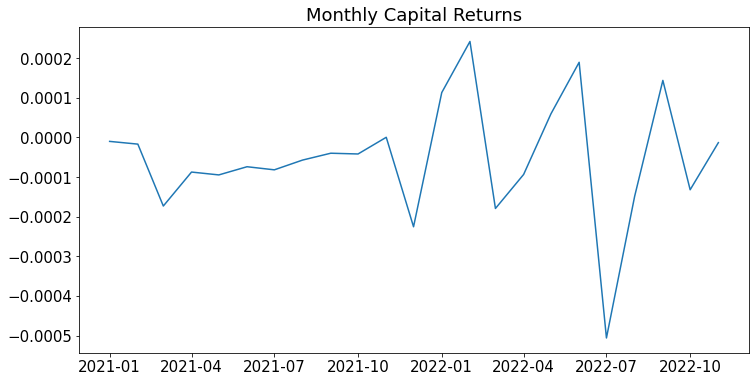

In [10]:
# Testing Strategy
def run_the_strategy(j, g, s, M):
    months_to_trade = list(set(ftsl_data['date'].apply(lambda x: datetime.datetime.strptime(datetime.datetime.strftime(x, '%m %Y'), '%m %Y'))))
    # Sort chronologically
    months_to_trade.sort()
    # Remove the first month to allow for running median
    months_to_trade.pop(0)

    capital_returns = []
    for month in months_to_trade:
        etf_1_data = ftsl_data[(ftsl_data['date'].dt.month == month.month) & (ftsl_data['date'].dt.year == month.year)]
        etf_2_data = smh_data[(ftsl_data['date'].dt.month == month.month) & (ftsl_data['date'].dt.year == month.year)]

        capital_returns.append(spread_reversion_strategy(Nt, M, g, j, etf_1_data, etf_2_data, ftsl_data, smh_data, s))
        
    x = months_to_trade
    y = capital_returns
    plt.title("Monthly Capital Returns")
    plt.plot(x, y)
    # Return a list of each month's capital returns
    return capital_returns

# Test with some preset values
run_the_strategy(0.01, 0.03, 0.03, 20)
plt.show()

## Optimization 

Now that I have a working example, I selected several variables that seemed reasonable for the given variables, before testing each to and keeping the best average return from all combinations of variables.

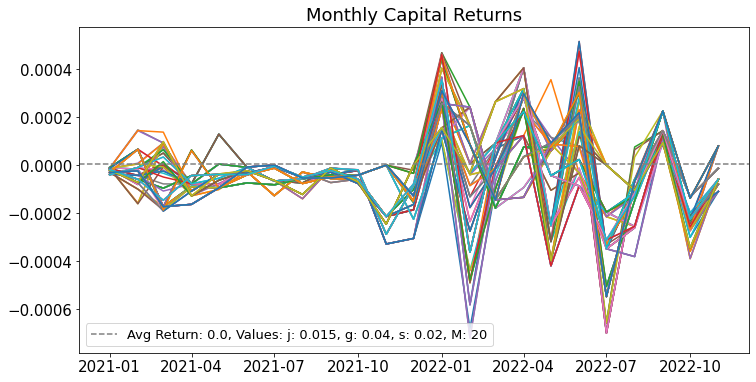

In [11]:
# Optimizing with various values
j_list = [0.005, 0.01, 0.015]
g_list = [0.03, 0.04, 0.05]
s_list = [0.03, 0.025, 0.02]
M_list = [10, 15, 20]
best_mean_return = 0
best_return_line = ''
for j in j_list:
    for g in g_list:
        for s in s_list:
            for M in M_list:
                new_mean = np.nanmean(run_the_strategy(j, g, s, M))
                if new_mean > best_mean_return:
                    best_mean_return = new_mean
                    best_return_line = f'j: {j}, g: {g}, s: {s}, M: {M}'
                    
plt.axhline(y=best_mean_return, color='gray', linestyle='--', label=f'Avg Return: {round(best_mean_return, 5)}, Values: {best_return_line}')
plt.legend(loc='best')
plt.show()

### Figure 1
Based on the above, the best mean capital return was 0, with variables j = 0.015, g = 0.04, s = 0.02, and M = 20. Given that result, I adjusted my values to see if we could improve upon that result and reran the simulation.

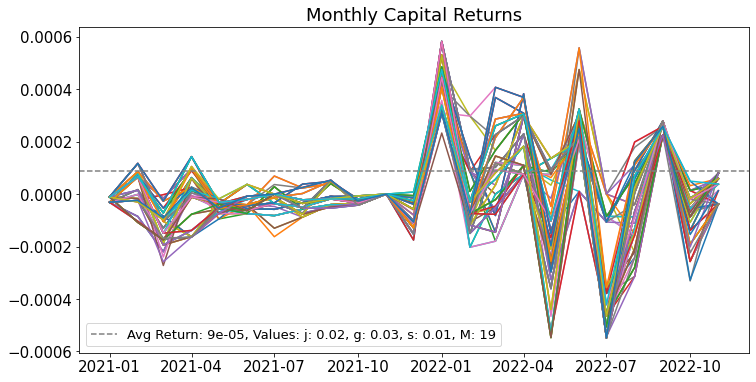

In [12]:
# Given the above, I tried again, shifting the values
# Optimizing with various values
j_list = [0.015, 0.02, 0.025]
g_list = [0.03, 0.04, 0.05]
s_list = [0.02, 0.015, 0.01]
M_list = [18, 19, 20]
best_mean_return = 0
best_return_line = ''
for j in j_list:
    for g in g_list:
        for s in s_list:
            for M in M_list:
                new_mean = np.nanmean(run_the_strategy(j, g, s, M))
                if new_mean > best_mean_return:
                    best_mean_return = new_mean
                    best_return_line = f'j: {j}, g: {g}, s: {s}, M: {M}'
                    
plt.axhline(y=best_mean_return, color='gray', linestyle='--', label=f'Avg Return: {round(best_mean_return, 5)}, Values: {best_return_line}')
plt.legend(loc='best')
plt.show()

### Figure 2
I was able to improve on my results from Figure 1, managing to average a positive capital return when j = 0.02, g = 0.03, s = 0.01, and M = 19. I wanted to run the simulation one more time to see if we could do any better. I specifically decided to try more variable M's, as 19 days seemed like a long time to use for spread trading returns.

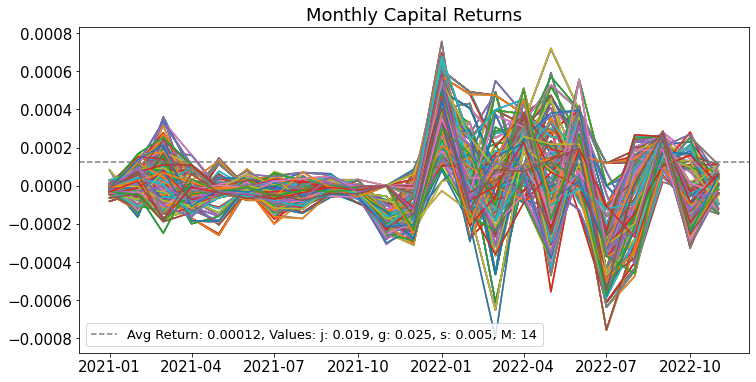

In [13]:
# Given the above, I tried one more time, shifting the values
# Optimizing with various values
j_list = [0.019, 0.02, 0.021]
g_list = [0.025, 0.03, 0.035]
s_list = [0.005, 0.01, 0.015]
M_list = range(3, 21)
best_mean_return = 0
best_return_line = ''
for j in j_list:
    for g in g_list:
        for s in s_list:
            for M in M_list:
                new_mean = np.nanmean(run_the_strategy(j, g, s, M))
                if new_mean > best_mean_return:
                    best_mean_return = new_mean
                    best_return_line = f'j: {j}, g: {g}, s: {s}, M: {M}'
                    
plt.axhline(y=best_mean_return, color='gray', linestyle='--', label=f'Avg Return: {round(best_mean_return, 5)}, Values: {best_return_line}')
plt.legend(loc='best')
plt.show()

### Figure 3
The simulation returned a better average return when I allowed the M's to vary more greatly, and I was able to update the average return to 0.012%. The final best values for the input parameters were j = 0.019, g = 0.025, s = 0.005, and M = 14. Overall, these numbers seem logical, as a 2.5% difference in the return spread seems like a reasonable point at which to start trading. Then, if the spread in returns drops to below 1.9%, we close the trade. Finally, looking back at the 14 day return seems a little high, but not unreasonable. 

## Analysis (French Fama)

Using the values from the optimization, I was able to run a regression against the French Fama factors and see if there was any return generated by this strategy outside of what Mkt, SMB, and HML could produce. We did get a small positive alpha, which implies there is some return to be gained from this strategy. By trading the return spreads of FTSL and SMH, we are able to get an alpha of 0.0012. Though not very large, this strategy might prove to be a good diversifier against French Fama, depending on the correlations.

In [14]:
# Analyze correlations to French Fama, with best data
j = 0.019
g = 0.025
s = 0.005
M = 14
months_to_trade = list(set(ftsl_data['date'].apply(lambda x: datetime.datetime.strptime(datetime.datetime.strftime(x, '%m %Y'), '%m %Y'))))
# Sort chronologically
months_to_trade.sort()
# Remove the first month to allow for running median
months_to_trade.pop(0)

strategy_returns = run_the_strategy(j, g, s, M)
plt.close()
strategy_df = pd.DataFrame(data=strategy_returns, index=months_to_trade, columns=['Strategy Returns'])
FF_returns_clean = FF_returns.drop(labels=[202012], axis=0).set_index(strategy_df.index)
# display(strategy_df)
# display(FF_returns_clean)
FF_3F = ['Mkt-RF','SMB','HML']

# df - the portfolio returns data
# factor_df - the factor returns data
# factors - a list of factors we're testing
# test - label for test (ex: 'French Fama')
def time_series_test(df, factor_df, factors, test, annualization=12):
    res = pd.DataFrame(data = None, index = df.columns, columns = [test + ' alpha', test + ' R-squared'])
    
    for port in df.columns:
        y = df[port]
        X = sm.add_constant(factor_df[factors])
        model = sm.OLS(y, X).fit()
        res.loc[port] = [model.params[0] * annualization, model.rsquared]
    
    return res

correlation_test = time_series_test(strategy_df, FF_returns_clean, FF_3F, 'French Fama')
display(correlation_test)

,French Fama alpha,French Fama R-squared
Strategy Returns,0.001213,0.421284


<AxesSubplot: >

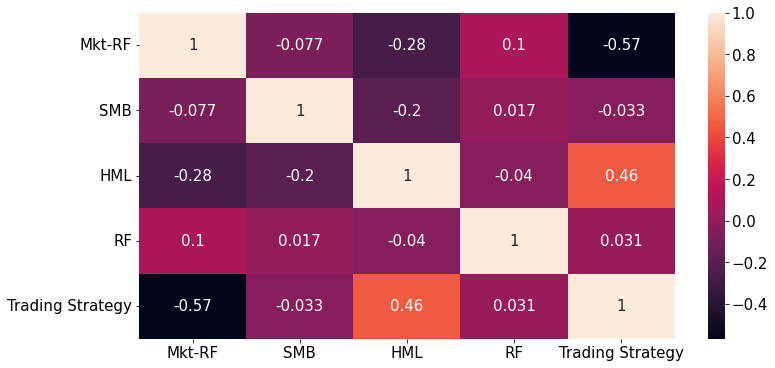

In [15]:
# Test Correlation
all_data = FF_returns_clean.copy()
all_data['Trading Strategy'] = strategy_df

corrmat = all_data.corr()
display(sns.heatmap(corrmat,annot=True))

### Correlations
After running the correlations, it is clear that the returns of my trading strategy are not very highly correlated to any of the French Fama Factors. The highest correlation in the diagram is the Spread Trade to HML (the Value factor) and even that is only 0.46. So while not necessarily delivering a large return, the correlations make it clear that this trading strategy operates as a useful diversifier (or even hedge) in the context of a larger strategy.

# Conclusion
Running a returns spread trade strategy on FTSL and SMH is profitable. It is possible, with the right parameters, to generate an average net positive return, with little correlation to French Fama. This experiment shows that the strategy returns value beyond what can be replicated with French Fama, even though the return is not very large. To further expand on this simulation, it would be nice to run the strategy with the selected parameters on Out-of-Sample data, to verify there is not a problem with overfitting. Additionally the volatility of 2021 and 2022 may have contributed to the results, and testing this strategy against a less volatile period may be worth investigating, given that volatility generally influences spreads. 